In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [150]:
import warnings
warnings.filterwarnings('ignore')

In [151]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_2.csv')

In [152]:
len_train = len(train)
dataset = pd.concat([train,test],axis=0,sort=True)

In [153]:
dataset.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548,2,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460,2,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608,2,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642,3,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836,3,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2840 non-null object
BsmtExposure     2840 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2840 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2840 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [155]:
dataset.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2761.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2904.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,0.597122,1.568003,472.712573,1.766016,1978.113727,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305795,4.694416,57.137718,101.851240,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,0.646129,0.552969,215.535686,0.762196,25.569657,506.051045,0.502872,842.787043,0.214462,7886.996359,23.344905,46.396825,42.517628,179.168399,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,59.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,80.000000,0.000000,70.000000,164.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


# Dealing with Missing Values

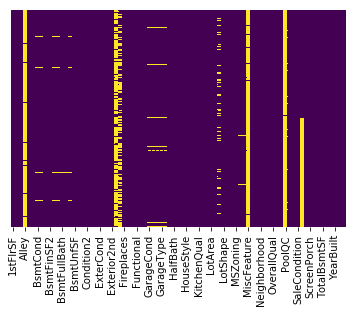

In [156]:
sns.heatmap(dataset.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [157]:
total_NaN = dataset.isnull().sum().sort_values(ascending=False)
number_of_rows_per_column = dataset.isnull().count()

percent = ((total_NaN/number_of_rows_per_column)*100).sort_values(ascending=False)

missing_values = pd.concat(objs=[total_NaN,percent],axis=1,keys=['Number of Missing Values',
                                                                                   'Percentage of Missing Values'])
missing_values.head(30)

,Number of Missing Values,Percentage of Missing Values
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,158,5.412813
GarageYrBlt,158,5.412813
GarageType,158,5.412813


**PoolQC, MiscFeature, Alley, Fence**: These features contain a high number of missing values but there are actually not missing values, these are 'NA' which were interpreted as NaNs by Pandas.

In [158]:
dataset['PoolQC'].fillna(value='NA',inplace=True)
dataset['MiscFeature'].fillna('NA',inplace=True)
dataset['Alley'].fillna('NA',inplace=True)
dataset['Fence'].fillna('NA',inplace=True)

In [159]:
total_NaN = dataset.isnull().sum().sort_values(ascending=False)
number_of_rows_per_column = dataset.isnull().count()

percent = ((total_NaN/number_of_rows_per_column)*100).sort_values(ascending=False)

missing_values = pd.concat(objs=[total_NaN,percent],axis=1,keys=['Number of Missing Values',
                                                                                   'Percentage of Missing Values'])
missing_values.head(30)

,Number of Missing Values,Percentage of Missing Values
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,158,5.412813
GarageQual,158,5.412813
GarageType,158,5.412813
GarageYrBlt,158,5.412813
GarageCond,158,5.412813
BsmtExposure,79,2.706406
BsmtFinType2,79,2.706406


**FireplaceQu**: Same as above, the missing values are actually 'NA' meaning 'no Fireplace' and these are wrongly intepreted by Pandas.

In [160]:
dataset['FireplaceQu'].fillna('NA',inplace=True)

**LotFrontage**: Replace the missing values by the median; these can considered as **Missing Completely At Random** values

In [161]:
dataset['LotFrontage'].fillna(dataset['LotFrontage'].median(),inplace=True)

In [162]:
total_NaN = dataset.isnull().sum().sort_values(ascending=False)
number_of_rows_per_column = dataset.isnull().count()

percent = ((total_NaN/number_of_rows_per_column)*100).sort_values(ascending=False)

missing_values = pd.concat(objs=[total_NaN,percent],axis=1,keys=['Number of Missing Values',
                                                                                   'Percentage of Missing Values'])
missing_values.head(30)

,Number of Missing Values,Percentage of Missing Values
SalePrice,1459,49.982871
GarageQual,158,5.412813
GarageType,158,5.412813
GarageYrBlt,158,5.412813
GarageFinish,158,5.412813
GarageCond,158,5.412813
BsmtQual,79,2.706406
BsmtFinType1,79,2.706406
BsmtExposure,79,2.706406
BsmtCond,79,2.706406


**GarageQual, GarageFinish, GarageCond and GarageType**: Same number of missing values, same as earlier, should replace NaNs by 'NA' for 'no garage'<br>
Regarding **GarageYrBlt**, missing values correspond to the situation when there is no garage so I'll replace these missing values by -1. This value is good for tree-based methods

In [163]:
dataset['GarageQual'].fillna('NA',inplace=True)
dataset['GarageFinish'].fillna('NA',inplace=True)
dataset['GarageCond'].fillna('NA',inplace=True)
dataset['GarageType'].fillna('NA',inplace=True)

dataset['GarageYrBlt'].fillna(value=-1,inplace=True)

In [164]:
total_NaN = dataset.isnull().sum().sort_values(ascending=False)
number_of_rows_per_column = dataset.isnull().count()

percent = ((total_NaN/number_of_rows_per_column)*100).sort_values(ascending=False)

missing_values = pd.concat(objs=[total_NaN,percent],axis=1,keys=['Number of Missing Values',
                                                                                   'Percentage of Missing Values'])
missing_values.head(22)

,Number of Missing Values,Percentage of Missing Values
SalePrice,1459,49.982871
BsmtFinType1,79,2.706406
BsmtFinType2,79,2.706406
BsmtCond,79,2.706406
BsmtExposure,79,2.706406
BsmtQual,79,2.706406
MasVnrArea,15,0.513875
MasVnrType,15,0.513875
MSZoning,4,0.137033
Utilities,2,0.068517


**BsmtQual, BsmtExposure, BsmtCond, BsmtFinType1, BsmtFinType2**: Replace them by the most common item for each.

In [165]:
dataset['BsmtQual'].fillna(dataset['BsmtQual'].mode()[0],inplace=True)
dataset['BsmtExposure'].fillna(dataset['BsmtExposure'].mode()[0],inplace=True)
dataset['BsmtCond'].fillna(dataset['BsmtCond'].mode()[0],inplace=True)
dataset['BsmtFinType1'].fillna(dataset['BsmtFinType1'].mode()[0],inplace=True)
dataset['BsmtFinType2'].fillna(dataset['BsmtFinType2'].mode()[0],inplace=True)

In [166]:
total_NaN = dataset.isnull().sum().sort_values(ascending=False)
number_of_rows_per_column = dataset.isnull().count()

percent = ((total_NaN/number_of_rows_per_column)*100).sort_values(ascending=False)

missing_values = pd.concat(objs=[total_NaN,percent],axis=1,keys=['Number of Missing Values',
                                                                                   'Percentage of Missing Values'])
missing_values.head(22)

,Number of Missing Values,Percentage of Missing Values
SalePrice,1459,49.982871
MasVnrArea,15,0.513875
MasVnrType,15,0.513875
MSZoning,4,0.137033
Utilities,2,0.068517
Functional,2,0.068517
BsmtHalfBath,2,0.068517
BsmtFullBath,2,0.068517
BsmtFinSF2,1,0.034258
KitchenQual,1,0.034258


**MasVnrArea, MasVnrType**: Replace MasVnrType by the most common item which is 'None' and the corresponded MasVnrType which is 0

In [167]:
dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mode()[0],inplace=True)
dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0],inplace=True)

In [168]:
total_NaN = dataset.isnull().sum().sort_values(ascending=False)
number_of_rows_per_column = dataset.isnull().count()

percent = ((total_NaN/number_of_rows_per_column)*100).sort_values(ascending=False)

missing_values = pd.concat(objs=[total_NaN,percent],axis=1,keys=['Number of Missing Values',
                                                                                   'Percentage of Missing Values'])
missing_values.head(22)

,Number of Missing Values,Percentage of Missing Values
SalePrice,1459,49.982871
MSZoning,4,0.137033
Utilities,2,0.068517
BsmtHalfBath,2,0.068517
Functional,2,0.068517
BsmtFullBath,2,0.068517
KitchenQual,1,0.034258
Electrical,1,0.034258
Exterior1st,1,0.034258
Exterior2nd,1,0.034258


**MSZoning, Utilities, Functional, BsmtHalfBath and BsmtFullBath**: Replace by the most common categorical value

In [169]:
dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0],inplace=True)
dataset['Utilities'].fillna(dataset['Utilities'].mode()[0],inplace=True)
dataset['Functional'].fillna(dataset['Functional'].mode()[0],inplace=True)
dataset['BsmtHalfBath'].fillna(dataset['BsmtHalfBath'].mode()[0],inplace=True)
dataset['BsmtFullBath'].fillna(dataset['BsmtFullBath'].mode()[0],inplace=True)

In [170]:
total_NaN = dataset.isnull().sum().sort_values(ascending=False)
number_of_rows_per_column = dataset.isnull().count()

percent = ((total_NaN/number_of_rows_per_column)*100).sort_values(ascending=False)

missing_values = pd.concat(objs=[total_NaN,percent],axis=1,keys=['Number of Missing Values',
                                                                                   'Percentage of Missing Values'])
missing_values.head(11)

,Number of Missing Values,Percentage of Missing Values
SalePrice,1459,49.982871
BsmtFinSF1,1,0.034258
KitchenQual,1,0.034258
Exterior1st,1,0.034258
Exterior2nd,1,0.034258
BsmtUnfSF,1,0.034258
BsmtFinSF2,1,0.034258
SaleType,1,0.034258
Electrical,1,0.034258
TotalBsmtSF,1,0.034258


In [171]:
dataset[dataset['BsmtFinSF1'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
660,896,0,0,NA,2,1Fam,TA,No,NaN,NaN,Unf,Unf,0.0,0.0,TA,NaN,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,NA,0,PConc,1,Typ,280,1,TA,Unf,TA,Detchd,1946.0,896,0,GasA,TA,1Story,2121,1,TA,Lvl,Gtl,5940,FR3,99.0,IR1,0,20,RM,0.0,None,NA,0,4,BrkSide,0,7,4,Y,0,NA,CompShg,Gable,Abnorml,NaN,ConLD,0,Pave,4,NaN,AllPub,0,1946,1950,2008


**BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF**:<br>
- Replace **BSmtFinSF1 and BsmtFinSF2** by 0 bc the basement are not finished yet for this house (check BsmtFinType1 and BsmtFinType1)<br>
- Replace **BsmtUnfSF** by its median bc it's giving the total area of the unfinished basements<br>
- Replace **TotalBsmtSF** by the median of BsmtUnfSF as for this house, all basements are unfinished

In [172]:
dataset['BsmtFinSF1'].fillna(0,inplace=True)
dataset['BsmtFinSF2'].fillna(0,inplace=True)
dataset['BsmtUnfSF'].fillna(dataset['BsmtUnfSF'].median(),inplace=True)
dataset['TotalBsmtSF'].fillna(dataset['BsmtUnfSF'].median(),inplace=True)

In [173]:
total_NaN = dataset.isnull().sum().sort_values(ascending=False)
number_of_rows_per_column = dataset.isnull().count()

percent = ((total_NaN/number_of_rows_per_column)*100).sort_values(ascending=False)

missing_values = pd.concat(objs=[total_NaN,percent],axis=1,keys=['Number of Missing Values',
                                                                                   'Percentage of Missing Values'])
missing_values.head(11)

,Number of Missing Values,Percentage of Missing Values
SalePrice,1459,49.982871
Exterior1st,1,0.034258
Exterior2nd,1,0.034258
KitchenQual,1,0.034258
SaleType,1,0.034258
Electrical,1,0.034258
YrSold,0,0.000000
Foundation,0,0.000000
ExterCond,0,0.000000
ExterQual,0,0.000000


In [174]:
pd.set_option('display.max_columns',dataset.shape[1]+1)
dataset[dataset['Exterior1st'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
691,1518,0,0,NA,2,1Fam,TA,Gd,1035.0,0.0,ALQ,Unf,1.0,0.0,TA,545.0,Y,Norm,Norm,SBrkr,0,TA,TA,NaN,NaN,NA,Gd,2,PConc,1,Typ,0,0,NA,NA,NA,NA,-1.0,1518,0,GasA,Ex,1Story,2152,1,Fa,Lvl,Gtl,19550,Inside,85.0,Reg,0,30,RL,0.0,None,NA,0,1,Edwards,39,7,5,Y,0,NA,Tar&Grv,Flat,Normal,NaN,WD,0,Pave,5,1580.0,AllPub,0,1940,2007,2008


**Exterior1st, Exterior2nd**: Replace both by the most common categorical value

In [175]:
dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0],inplace=True)
dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0],inplace=True)

In [176]:
total_NaN = dataset.isnull().sum().sort_values(ascending=False)
number_of_rows_per_column = dataset.isnull().count()

percent = ((total_NaN/number_of_rows_per_column)*100).sort_values(ascending=False)

missing_values = pd.concat(objs=[total_NaN,percent],axis=1,keys=['Number of Missing Values',
                                                                                   'Percentage of Missing Values'])
missing_values.head(5)

,Number of Missing Values,Percentage of Missing Values
SalePrice,1459,49.982871
KitchenQual,1,0.034258
SaleType,1,0.034258
Electrical,1,0.034258
YrSold,0,0.000000


In [177]:
dataset[dataset['KitchenQual'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
95,725,499,0,NA,3,1Fam,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,689.0,N,Norm,Norm,SBrkr,248,TA,TA,Wd Sdng,Wd Sdng,NA,NA,0,BrkTil,1,Mod,180,1,Fa,Unf,Fa,Detchd,1917.0,1224,1,GasA,Gd,1.5Fin,1556,1,NaN,Lvl,Gtl,10632,Inside,72.0,IR1,0,50,RL,0.0,None,NA,0,1,ClearCr,0,3,5,N,0,NA,CompShg,Gable,Normal,NaN,COD,0,Pave,6,689.0,AllPub,0,1917,1950,2010


**KitchenQual**: Replace by the most common categorical feature

In [178]:
dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0],inplace=True)

In [179]:
total_NaN = dataset.isnull().sum().sort_values(ascending=False)
number_of_rows_per_column = dataset.isnull().count()

percent = ((total_NaN/number_of_rows_per_column)*100).sort_values(ascending=False)

missing_values = pd.concat(objs=[total_NaN,percent],axis=1,keys=['Number of Missing Values',
                                                                                   'Percentage of Missing Values'])
missing_values.head(11)

,Number of Missing Values,Percentage of Missing Values
SalePrice,1459,49.982871
SaleType,1,0.034258
Electrical,1,0.034258
Foundation,0,0.000000
ExterCond,0,0.000000
ExterQual,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
Fence,0,0.000000
FireplaceQu,0,0.000000


**SaleType**: Replace using mode()

In [180]:
dataset['SaleType'].fillna(dataset['SaleType'].mode()[0],inplace=True)

In [181]:
total_NaN = dataset.isnull().sum().sort_values(ascending=False)
number_of_rows_per_column = dataset.isnull().count()

percent = ((total_NaN/number_of_rows_per_column)*100).sort_values(ascending=False)

missing_values = pd.concat(objs=[total_NaN,percent],axis=1,keys=['Number of Missing Values',
                                                                                   'Percentage of Missing Values'])
missing_values.head(3)

,Number of Missing Values,Percentage of Missing Values
SalePrice,1459,49.982871
Electrical,1,0.034258
FullBath,0,0.000000


In [182]:
dataset[dataset['Electrical'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1379,754,640,0,NA,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,384.0,Y,Norm,Norm,NaN,0,TA,TA,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,400,2,TA,Fin,TA,BuiltIn,2007.0,1394,1,GasA,Gd,SLvl,1380,1,Gd,Lvl,Gtl,9735,Inside,73.0,Reg,0,80,RL,0.0,None,NA,0,5,Timber,0,5,5,Y,0,NA,CompShg,Gable,Normal,167500.0,WD,0,Pave,7,384.0,AllPub,100,2006,2007,2008


**Electrical**: Replace it using mode()

In [183]:
dataset.fillna(dataset['Electrical'].mode()[0],inplace=True)

In [184]:
total_NaN = dataset.isnull().sum().sort_values(ascending=False)
number_of_rows_per_column = dataset.isnull().count()

percent = ((total_NaN/number_of_rows_per_column)*100).sort_values(ascending=False)

missing_values = pd.concat(objs=[total_NaN,percent],axis=1,keys=['Number of Missing Values',
                                                                                   'Percentage of Missing Values'])
missing_values.head(2)

,Number of Missing Values,Percentage of Missing Values
YrSold,0,0.0
HalfBath,0,0.0


In [185]:
#Verifying the number of total missing values
dataset.isnull().sum().sum()

0

# EDA

In [186]:
train = dataset[:len_train]

In [187]:
train.shape

(1460, 81)

In [188]:
train = train.astype({'SalePrice': np.int64})

In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
3SsnPorch        1460 non-null int64
Alley            1460 non-null object
BedroomAbvGr     1460 non-null int64
BldgType         1460 non-null object
BsmtCond         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtFinType1     1460 non-null object
BsmtFinType2     1460 non-null object
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
BsmtQual         1460 non-null object
BsmtUnfSF        1460 non-null float64
CentralAir       1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
Electrical       1460 non-null object
EnclosedPorch    1460 non-null int64
ExterCond        1460 non-null object
ExterQual        1460 non-null object
Exterior1st      14

### **An excellent quality pool increases the sale price quite a lot**

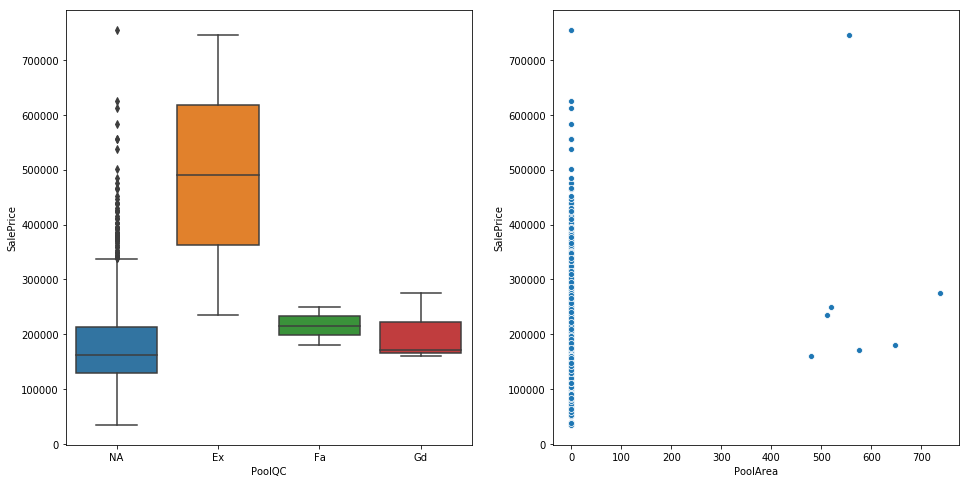

In [190]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x='PoolQC',y='SalePrice',data=train)

plt.subplot(1,2,2)
sns.scatterplot(x='PoolArea',y='SalePrice',data=train)

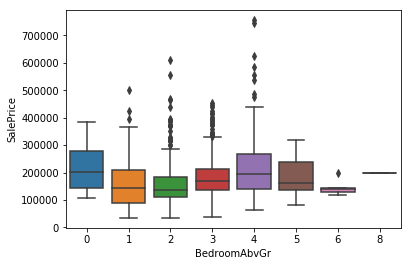

In [191]:
sns.boxplot(x='BedroomAbvGr',y='SalePrice',data=train)

### **The bigger total bsmt area we have, the higher the sale price**

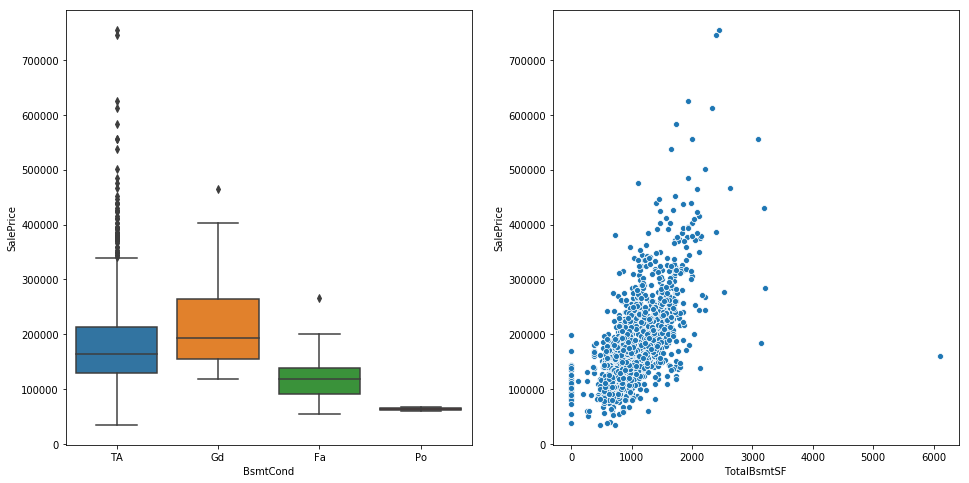

In [192]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x='BsmtCond',y='SalePrice',data=train)

plt.subplot(1,2,2)
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train)

### **The higher the number of bathrooms, the higher the sale price**

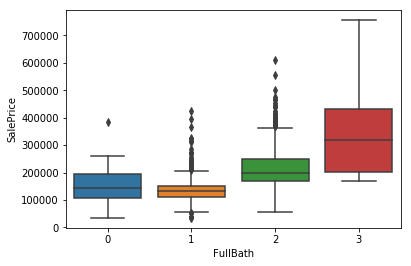

In [193]:
sns.boxplot(x='FullBath',y='SalePrice',data=train)

### **The bigger a garage, the higher the sale price**

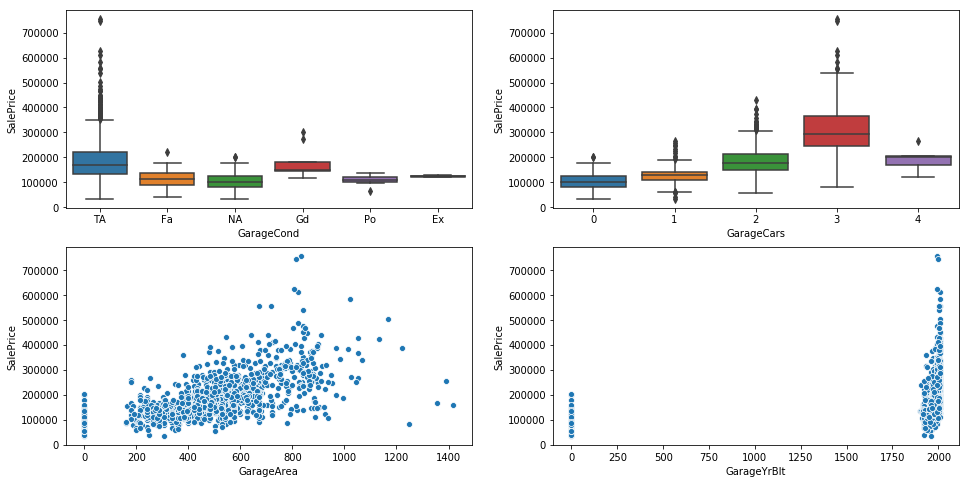

In [194]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.boxplot(x='GarageCond',y='SalePrice',data=train)

plt.subplot(2,2,2)
sns.boxplot(x='GarageCars',y='SalePrice',data=train)

plt.subplot(2,2,3)
sns.scatterplot(x='GarageArea',y='SalePrice',data=train)

plt.subplot(2,2,4)
sns.scatterplot(x='GarageYrBlt',y='SalePrice',data=train)

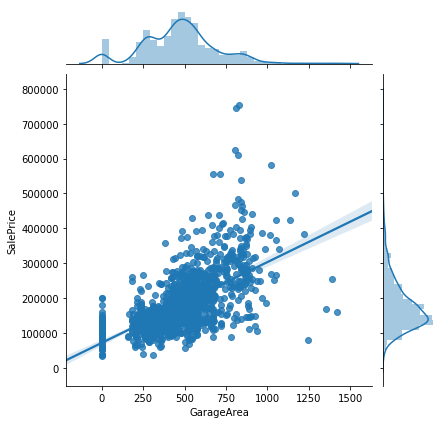

In [195]:
sns.jointplot(x='GarageArea',y='SalePrice',kind='reg',data=train)

### **The above ground living area is highly correlated to SalePrice**

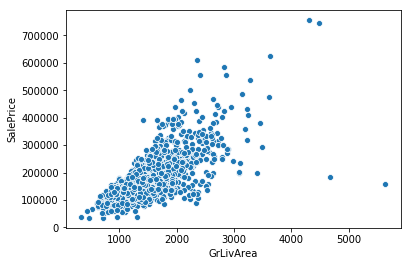

In [196]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

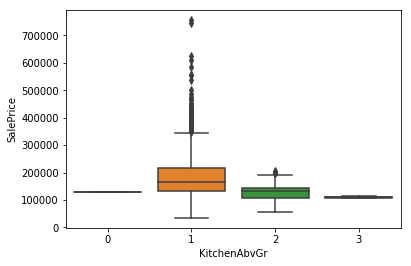

In [197]:
sns.boxplot(x='KitchenAbvGr',y='SalePrice',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

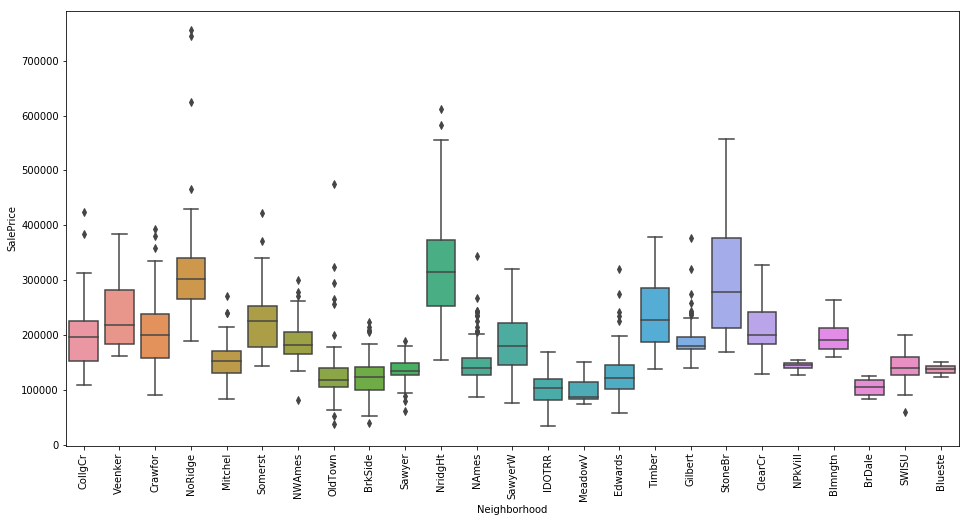

In [198]:
plt.figure(figsize=(16,8))

sns.boxplot(x='Neighborhood',y='SalePrice',data=train)
plt.xticks(rotation = 90)

### **The better the overall quality, the higher the price**

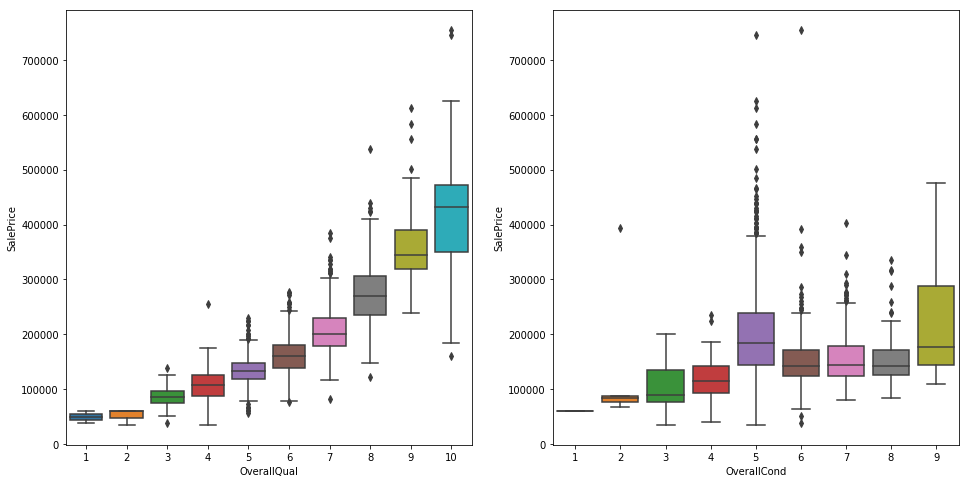

In [199]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x='OverallQual',y='SalePrice',data=train)

plt.subplot(1,2,2)
sns.boxplot(x='OverallCond',y='SalePrice',data=train)

### **The higher the number of rooms, the higher the sale price**

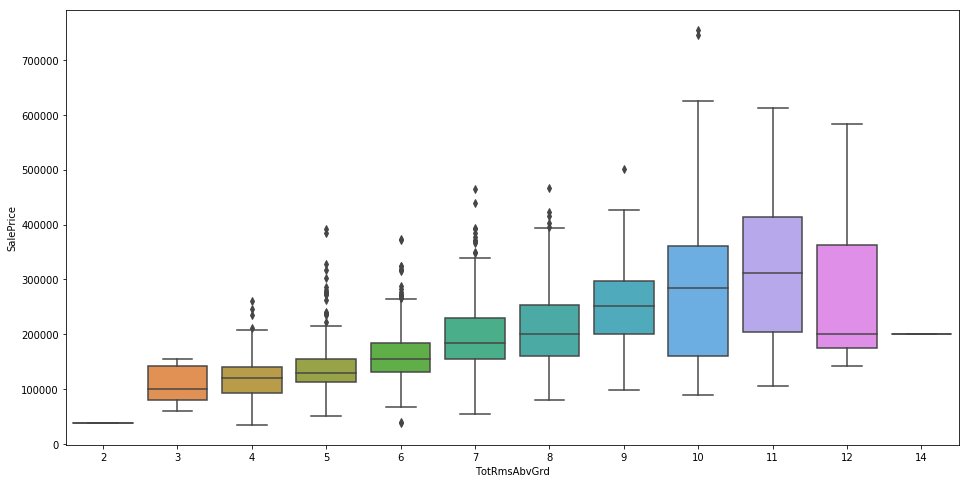

In [200]:
plt.figure(figsize=(16,8))

sns.boxplot(x='TotRmsAbvGrd',y='SalePrice',data=train)

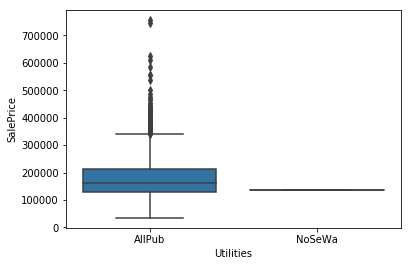

In [201]:
sns.boxplot(x='Utilities',y='SalePrice',data=train)

### **No true correlation between the Year Built and the sale price**

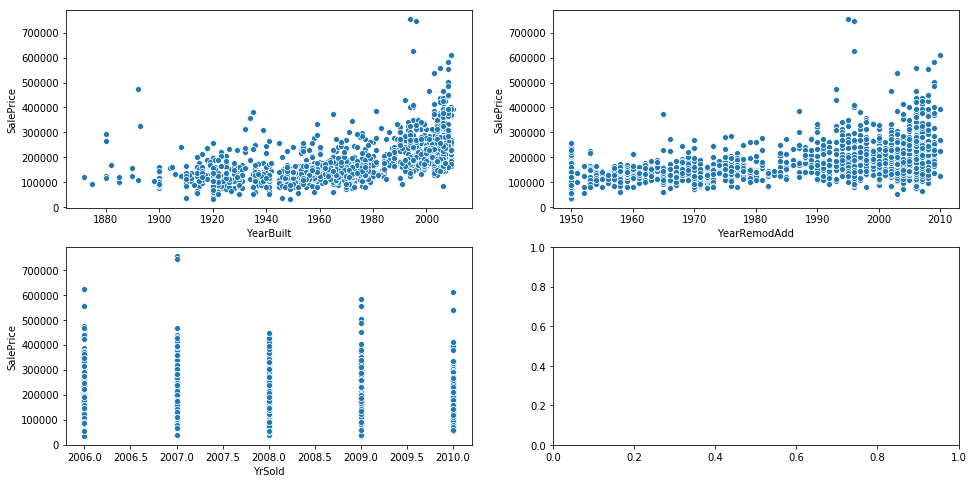

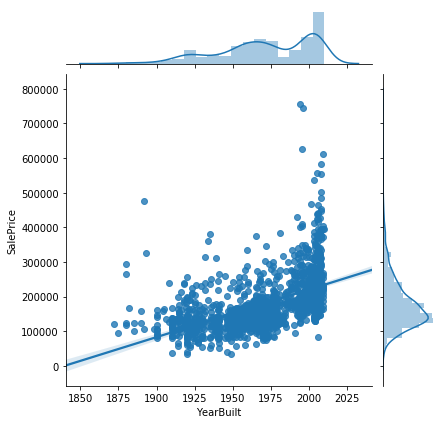

In [202]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.scatterplot(x='YearBuilt',y='SalePrice',data=train)

plt.subplot(2,2,2)
sns.scatterplot(x='YearRemodAdd',y='SalePrice',data=train)

plt.subplot(2,2,3)
sns.scatterplot(x='YrSold',y='SalePrice',data=train)

plt.subplot(2,2,4)
sns.jointplot(x='YearBuilt',y='SalePrice',kind='reg',data=train)

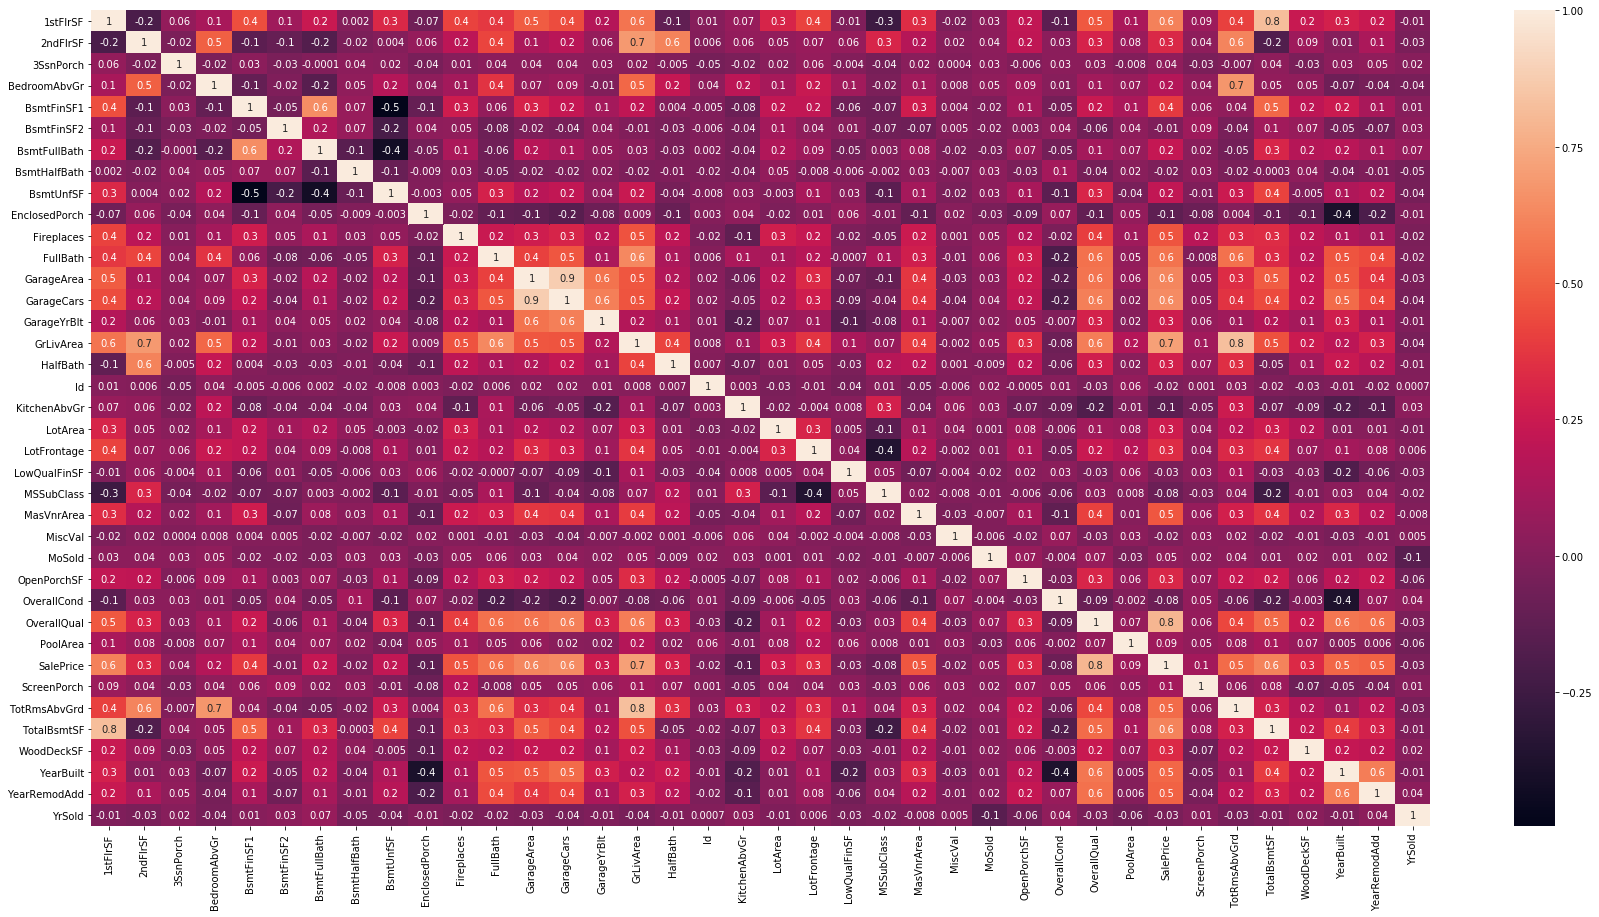

In [203]:
plt.figure(figsize=(30,15))
sns.heatmap(train.corr(),annot=True,fmt='.1g')

# Feature Engineering

In [204]:
pd.set_option('display.max_columns',dataset.shape[1]+1)
dataset

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NA,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,548,2,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NA,0,2,CollgCr,61,5,7,Y,0,NA,CompShg,Gable,Normal,208500,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NA,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NA,TA,1,CBlock,2,Typ,460,2,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NA,0,5,Veenker,0,8,6,Y,0,NA,CompShg,Gable,Normal,181500,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NA,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,608,2,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NA,0,9,CollgCr,42,5,7,Y,0,NA,CompShg,Gable,Normal,223500,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NA,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NA,Gd,1,BrkTil,1,Typ,642,3,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NA,0,2,Crawfor,35,5,7,Y,0,NA,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NA,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,836,3,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NA,0,12,NoRidge,84,5,8,Y,0,NA,CompShg,Gable,Normal,250000,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,NA,3,Twnhs,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,546.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,NA,NA,0,CBlock,1,Typ,0,0,NA,NA,NA,NA,-1.0,1092,1,GasA,Gd,2Story,2915,1,TA,Lvl,Gtl,1936,Inside,21.0,Reg,0,160,RM,0.0,None,NA,0,6,MeadowV,0,7,4,Y,0,NA,CompShg,Gable,Normal,SBrkr,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,NA,3,TwnhsE,TA,No,252.0,0.0,Rec,Unf,0.0,0.0,TA,294.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,NA,NA,0,CBlock,1,Typ,286,1,TA,Unf,TA,CarPort,1970.0,1092,1,GasA,TA,2Story,2916,1,TA,Lvl,Gtl,1894,Inside,21.0,Reg,0,160,RM,0.0,None,NA,0,4,MeadowV,24,5,4,Y,0,NA,CompShg,Gable,Abnorml,SBrkr,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,NA,4,1Fam,TA,No,1224.0,0.0,ALQ,Unf,1.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NA,TA,1,CBlock,1,Typ,576,2,TA,Unf,TA,Detchd,1960.0,1224,0,GasA,Ex,1Story,2917,1,TA,Lvl,Gtl,20000,Inside,160.0,Reg,0,20,RL,0.0,None,NA,0,9,Mitchel,0,7,5,Y,0,NA,CompShg,Gable,Abnorml,SBrkr,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,NA,3,1Fam,TA,Av,337.0,0.0,GLQ,Unf,0.0,1.0,Gd,575.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Wd Shng,MnPrv,NA,0,PConc,1,Typ,0,0,NA,NA,NA,NA

## Continuous Features

### **1stFlrSF**,**2ndFltSF**, **3SsnPorch, EnclosedPorch, OpenPorchSF, ScreenPorch**

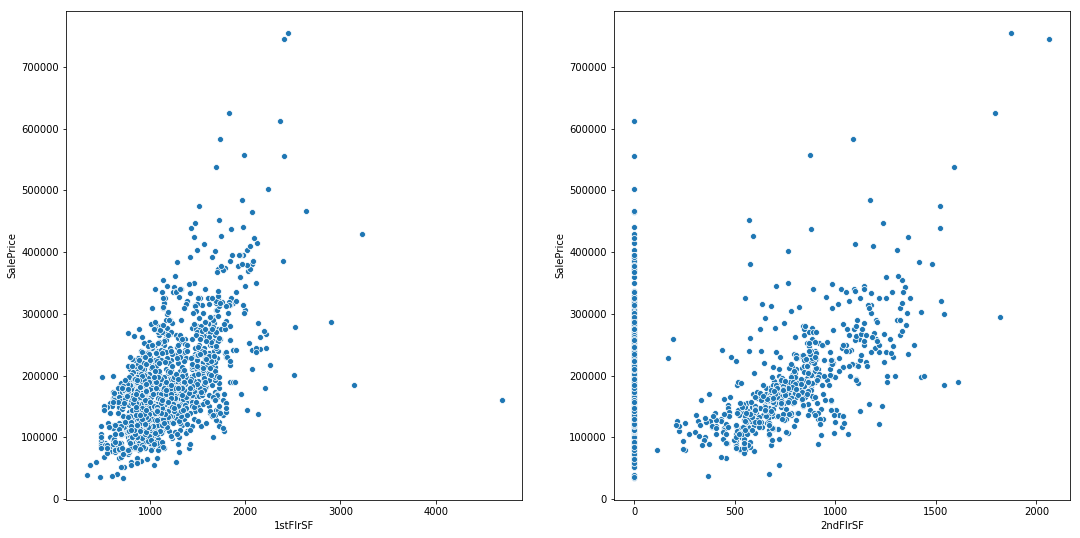

In [205]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=train)

plt.subplot(1,2,2)
sns.scatterplot(x='2ndFlrSF',y='SalePrice',data=train)

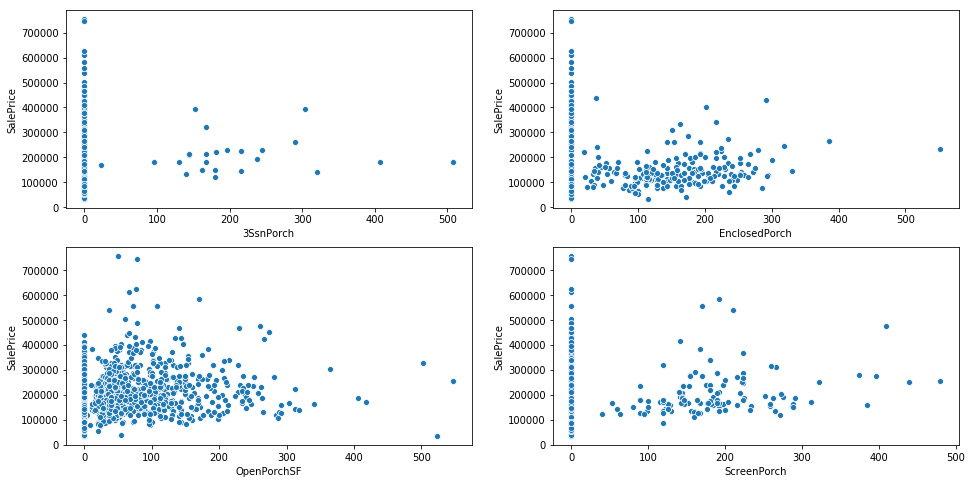

In [206]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.scatterplot(x='3SsnPorch',y='SalePrice',data=train)

plt.subplot(2,2,2)
sns.scatterplot(x='EnclosedPorch',y='SalePrice',data=train)

plt.subplot(2,2,3)
sns.scatterplot(x='OpenPorchSF',y='SalePrice',data=train)

plt.subplot(2,2,4)
sns.scatterplot(x='ScreenPorch',y='SalePrice',data=train)

**1stFlrSF**: We'd like to bin this feature into quartiles to get rid of outliers<br>
**2ndFltSF**: We're gonna bin this feature into quartiles and create a new binarized feature 'Have2ndFlr'<br>
**3SsnPorch, EnclosedPorch, OpenPorchSF, ScreenPorch**: Binarize it and create a new columns 'havePorch'

In [207]:
from sklearn.preprocessing import Binarizer

In [208]:
binarizer = Binarizer(threshold=0)

In [209]:
#Binarizing
secondFlr = dataset.iloc[:,[1]].values
havePorch = dataset.iloc[:,[2]].values

secondFlr_binarized = binarizer.fit_transform(secondFlr)
havePorch_binarized = binarizer.fit_transform(havePorch)

dataset['have2ndFlr'] = secondFlr_binarized
dataset['havePorch'] = havePorch_binarized

In [210]:
#Bining variables
dataset['1stFlrSFBin'] = pd.qcut(dataset['1stFlrSF'],4,labels=['1stFlrSF_Int1','1stFlrSF_Int2','1stFlrSF_Int3','1stFlrSF_Int4'])
dataset['2ndFlrSFBin'] = pd.qcut(dataset['2ndFlrSF'],4,duplicates='drop',labels=['2ndFlrSF_Int1','2ndFlrSF_Int2'])

In [211]:
dataset.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,...,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,have2ndFlr,havePorch,1stFlrSFBin,2ndFlrSFBin
0,856,854,0,NA,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,548,2,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,...,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NA,0,2,CollgCr,61,5,7,Y,0,NA,CompShg,Gable,Normal,208500,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008,1,0,1stFlrSF_Int1,2ndFlrSF_Int2
1,1262,0,0,NA,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NA,TA,1,CBlock,2,Typ,460,2,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,...,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NA,0,5,Veenker,0,8,6,Y,0,NA,CompShg,Gable,Normal,181500,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,0,0,1stFlrSF_Int3,2ndFlrSF_Int1
2,920,866,0,NA,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,608,2,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,...,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NA,0,9,CollgCr,42,5,7,Y,0,NA,CompShg,Gable,Normal,223500,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008,1,0,1stFlrSF_Int2,2ndFlrSF_Int2
3,961,756,0,NA,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NA,Gd,1,BrkTil,1,Typ,642,3,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,...,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NA,0,2,Crawfor,35,5,7,Y,0,NA,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006,1,0,1stFlrSF_Int2,2ndFlrSF_Int2
4,1145,1053,0,NA,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,836,3,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,...,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NA,0,12,NoRidge,84,5,8,Y,0,NA,CompShg,Gable,Normal,250000,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,1,0,1stFlrSF_Int3,2ndFlrSF_Int2


In [212]:
#Get dymmu variables
firstFlr_code = pd.get_dummies(data=dataset['1stFlrSFBin'],drop_first=True)
secondFlr_code = pd.get_dummies(data=dataset['2ndFlrSFBin'],drop_first=True)

#Concatenate dataframes
dataset = pd.concat(objs=[dataset,firstFlr_code,secondFlr_code],axis=1)

#Drop variables
dataset.drop('1stFlrSF',axis=1,inplace=True)
dataset.drop('2ndFlrSF',axis=1,inplace=True)
dataset.drop('1stFlrSFBin',axis=1,inplace=True)
dataset.drop('2ndFlrSFBin',axis=1,inplace=True)

dataset.head()

,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,...,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,have2ndFlr,havePorch,1stFlrSF_Int2,1stFlrSF_Int3,1stFlrSF_Int4,2ndFlrSF_Int2
0,0,NA,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,548,2,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,...,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NA,0,2,CollgCr,61,5,7,Y,0,NA,CompShg,Gable,Normal,208500,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008,1,0,0,0,0,1
1,0,NA,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NA,TA,1,CBlock,2,Typ,460,2,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,...,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NA,0,5,Veenker,0,8,6,Y,0,NA,CompShg,Gable,Normal,181500,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,0,0,0,1,0,0
2,0,NA,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,608,2,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,...,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NA,0,9,CollgCr,42,5,7,Y,0,NA,CompShg,Gable,Normal,223500,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008,1,0,1,0,0,1
3,0,NA,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NA,Gd,1,BrkTil,1,Typ,642,3,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,...,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NA,0,2,Crawfor,35,5,7,Y,0,NA,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006,1,0,1,0,0,1
4,0,NA,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,836,3,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,...,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NA,0,12,NoRidge,84,5,8,Y,0,NA,CompShg,Gable,Normal,250000,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,1,0,0,1,0,1


### BsmtFinSF1, BsmtFinSF2

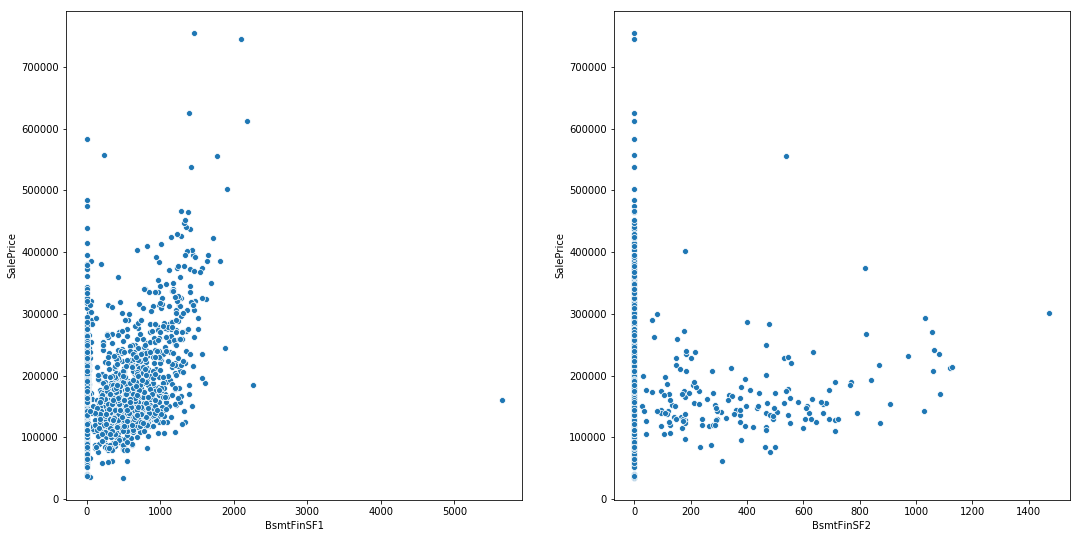

In [213]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
sns.scatterplot(x='BsmtFinSF1',y='SalePrice',data=train)

plt.subplot(1,2,2)
sns.scatterplot(x='BsmtFinSF2',y='SalePrice',data=train)

### BsmtHalfBath, BsmtFullBath, BsmtUnfSF, TotalBsmtSF

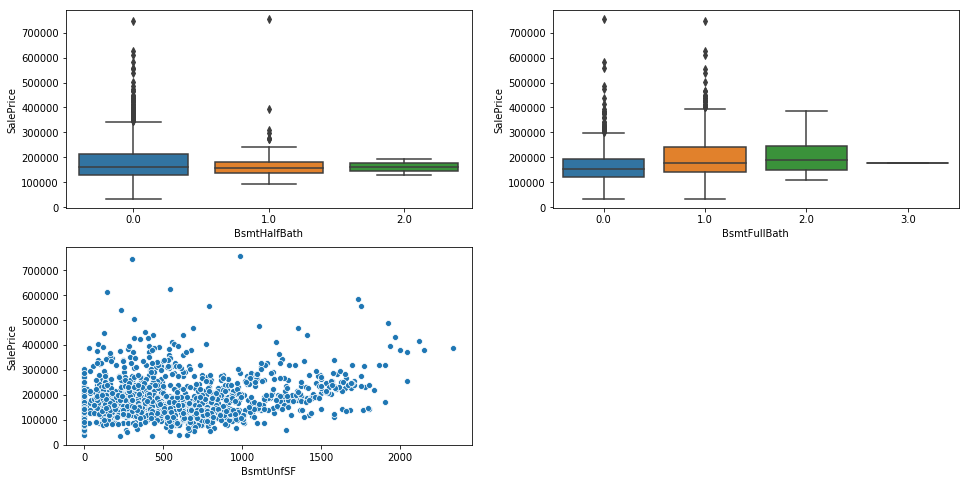

In [214]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.boxplot(x='BsmtHalfBath',y='SalePrice',data=train)

plt.subplot(2,2,2)
sns.boxplot(x='BsmtFullBath',y='SalePrice',data=train)

plt.subplot(2,2,3)
sns.scatterplot(x='BsmtUnfSF',y='SalePrice',data=train)

**Regarding 'TotalBsmtSF': I'm going to categorize it using qcut as it is well correlated to 'SalePrice'**

In [215]:
#Categorize the variable
dataset['TotalBsmtSFBin'] = pd.qcut(dataset['TotalBsmtSF'],4,labels=['TotalBsmtSF_Int1','TotalBsmtSF_Int2','TotalBsmtSF_Int3','TotalBsmtSF_Int4'])

#Binarize the binning variable
totalBsmtSF_code = pd.get_dummies(dataset['TotalBsmtSFBin'],drop_first=True)

#Concatenate dataframes
dataset = pd.concat([dataset,totalBsmtSF_code],axis=1)

#Drop features
dataset.drop('TotalBsmtSF',axis=1,inplace=True)
dataset.drop('TotalBsmtSFBin',axis=1,inplace=True)

dataset.head()

,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,...,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,have2ndFlr,havePorch,1stFlrSF_Int2,1stFlrSF_Int3,1stFlrSF_Int4,2ndFlrSF_Int2,TotalBsmtSF_Int2,TotalBsmtSF_Int3,TotalBsmtSF_Int4
0,0,NA,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,548,2,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,...,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NA,0,2,CollgCr,61,5,7,Y,0,NA,CompShg,Gable,Normal,208500,WD,0,Pave,8,AllPub,0,2003,2003,2008,1,0,0,0,0,1,1,0,0
1,0,NA,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NA,TA,1,CBlock,2,Typ,460,2,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,...,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NA,0,5,Veenker,0,8,6,Y,0,NA,CompShg,Gable,Normal,181500,WD,0,Pave,6,AllPub,298,1976,1976,2007,0,0,0,1,0,0,0,1,0
2,0,NA,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,608,2,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,...,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NA,0,9,CollgCr,42,5,7,Y,0,NA,CompShg,Gable,Normal,223500,WD,0,Pave,6,AllPub,0,2001,2002,2008,1,0,1,0,0,1,1,0,0
3,0,NA,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NA,Gd,1,BrkTil,1,Typ,642,3,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,...,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NA,0,2,Crawfor,35,5,7,Y,0,NA,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,AllPub,0,1915,1970,2006,1,0,1,0,0,1,0,0,0
4,0,NA,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,836,3,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,...,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NA,0,12,NoRidge,84,5,8,Y,0,NA,CompShg,Gable,Normal,250000,WD,0,Pave,9,AllPub,192,2000,2000,2008,1,0,0,1,0,1,0,1,0


### GarageArea, GarageYrBlt

**GarageArea: important feature: binarize it to create a new feature 'haveGarage' then categorize it with qcut**<br>
**GarageYrBlt: not really important according to me - keep as it is and decide if we keep it or not in the 'Feature Selection' part**

In [216]:
#Binarize to create a new feature
garageArea = dataset.iloc[:,[29]].values
garageArea_binarized = binarizer.fit_transform(garageArea)
dataset['haveGarage'] = garageArea_binarized

#Categorize using binning
dataset['GarageAreaBin'] = pd.qcut(dataset['GarageArea'],4,labels=['GarageArea_Int1','GarageArea_Int2','GarageArea_Int3','GarageArea_Int4'])

#Binarize the binned variables
garageArea_code = pd.get_dummies(dataset['GarageAreaBin'],drop_first=True)

#Concatenate the dataframes
dataset = pd.concat([dataset,garageArea_code],axis=1)

#Drop the continuous and binned variables
dataset.drop('GarageArea',axis=1,inplace=True)
dataset.drop('GarageAreaBin',axis=1,inplace=True)

### GrLivArea

**GrLivArea: Very important - to categorize with qcut**

In [217]:
#Categorize using binning
dataset['GrLivAreaBin'] = pd.qcut(dataset['GrLivArea'],6,labels=['GrLivArea_Int1','GrLivArea_Int2','GrLivArea_Int3',
                                                                 'GrLivArea_Int4','GrLivArea_Int5','GrLivArea_Int6'])
#Binarize the binned variables
grLivArea_code = pd.get_dummies(dataset['GrLivAreaBin'],drop_first=True)

#Concatenate the dataframes
dataset = pd.concat([dataset,grLivArea_code],axis=1)

#Drop the continuous and binned variables
dataset.drop('GrLivArea',axis=1,inplace=True)
dataset.drop('GrLivAreaBin',axis=1,inplace=True)

dataset.head()

,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,...,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,have2ndFlr,havePorch,1stFlrSF_Int2,1stFlrSF_Int3,1stFlrSF_Int4,2ndFlrSF_Int2,TotalBsmtSF_Int2,TotalBsmtSF_Int3,TotalBsmtSF_Int4,haveGarage,GarageArea_Int2,GarageArea_Int3,GarageArea_Int4,GrLivArea_Int2,GrLivArea_Int3,GrLivArea_Int4,GrLivArea_Int5,GrLivArea_Int6
0,0,NA,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,2,TA,RFn,TA,Attchd,2003.0,1,GasA,Ex,2Story,1,1,...,NA,0,2,CollgCr,61,5,7,Y,0,NA,CompShg,Gable,Normal,208500,WD,0,Pave,8,AllPub,0,2003,2003,2008,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0
1,0,NA,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NA,TA,1,CBlock,2,Typ,2,TA,RFn,TA,Attchd,1976.0,0,GasA,Ex,1Story,2,1,...,NA,0,5,Veenker,0,8,6,Y,0,NA,CompShg,Gable,Normal,181500,WD,0,Pave,6,AllPub,298,1976,1976,2007,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0
2,0,NA,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,2,TA,RFn,TA,Attchd,2001.0,1,GasA,Ex,2Story,3,1,...,NA,0,9,CollgCr,42,5,7,Y,0,NA,CompShg,Gable,Normal,223500,WD,0,Pave,6,AllPub,0,2001,2002,2008,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
3,0,NA,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NA,Gd,1,BrkTil,1,Typ,3,TA,Unf,TA,Detchd,1998.0,0,GasA,Gd,2Story,4,1,...,NA,0,2,Crawfor,35,5,7,Y,0,NA,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,AllPub,0,1915,1970,2006,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
4,0,NA,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,3,TA,RFn,TA,Attchd,2000.0,1,GasA,Ex,2Story,5,1,...,NA,0,12,NoRidge,84,5,8,Y,0,NA,CompShg,Gable,Normal,250000,WD,0,Pave,9,AllPub,192,2000,2000,2008,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1


### LotArea, LotFrontage

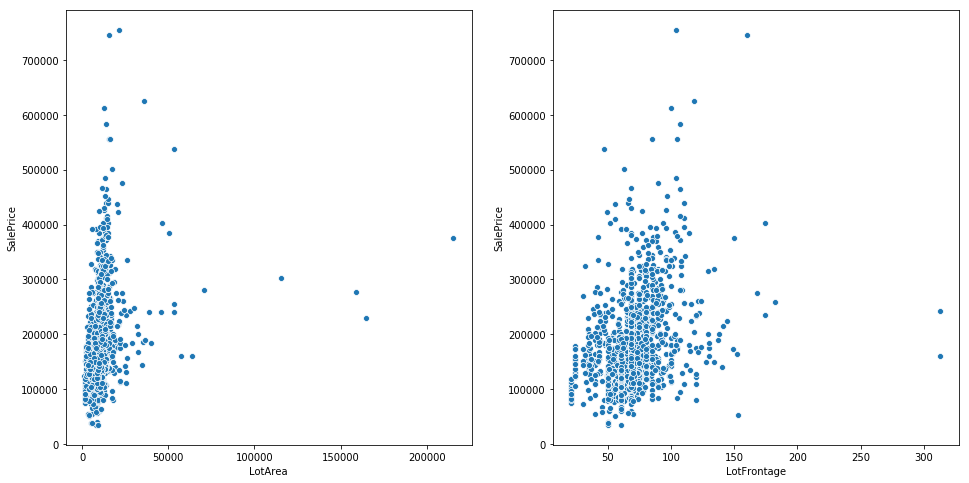

In [218]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.scatterplot(x='LotArea',y='SalePrice',data=train)

plt.subplot(1,2,2)
sns.scatterplot(x='LotFrontage',y='SalePrice',data=train)

**LotArea: not really important according to me - keep as it is and decide if we keep it or not in the 'Feature Selection' part**<br>
**LotFrontage: can be important according to me - categorize to get rid of outliers and we'll see later on**

In [219]:
#Categorize using binning
dataset['LotFrontageBin'] = pd.qcut(dataset['LotFrontage'],3,labels=['LotFrontage_Int1','LotFrontage_Int2','LotFrontage_Int3'])

#Binarize the binned variables
lotFrontage_code = pd.get_dummies(dataset['LotFrontageBin'],drop_first=True)

#Concatenate the dataframes
dataset = pd.concat([dataset,lotFrontage_code],axis=1)

#Drop the continuous and binned variables
dataset.drop('LotFrontage',axis=1,inplace=True)
dataset.drop('LotFrontageBin',axis=1,inplace=True)

dataset.head()

,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,...,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,have2ndFlr,havePorch,1stFlrSF_Int2,1stFlrSF_Int3,1stFlrSF_Int4,2ndFlrSF_Int2,TotalBsmtSF_Int2,TotalBsmtSF_Int3,TotalBsmtSF_Int4,haveGarage,GarageArea_Int2,GarageArea_Int3,GarageArea_Int4,GrLivArea_Int2,GrLivArea_Int3,GrLivArea_Int4,GrLivArea_Int5,GrLivArea_Int6,LotFrontage_Int2,LotFrontage_Int3
0,0,NA,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,2,TA,RFn,TA,Attchd,2003.0,1,GasA,Ex,2Story,1,1,...,2,CollgCr,61,5,7,Y,0,NA,CompShg,Gable,Normal,208500,WD,0,Pave,8,AllPub,0,2003,2003,2008,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0
1,0,NA,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NA,TA,1,CBlock,2,Typ,2,TA,RFn,TA,Attchd,1976.0,0,GasA,Ex,1Story,2,1,...,5,Veenker,0,8,6,Y,0,NA,CompShg,Gable,Normal,181500,WD,0,Pave,6,AllPub,298,1976,1976,2007,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1
2,0,NA,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,2,TA,RFn,TA,Attchd,2001.0,1,GasA,Ex,2Story,3,1,...,9,CollgCr,42,5,7,Y,0,NA,CompShg,Gable,Normal,223500,WD,0,Pave,6,AllPub,0,2001,2002,2008,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0
3,0,NA,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NA,Gd,1,BrkTil,1,Typ,3,TA,Unf,TA,Detchd,1998.0,0,GasA,Gd,2Story,4,1,...,2,Crawfor,35,5,7,Y,0,NA,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,AllPub,0,1915,1970,2006,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,0,NA,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,3,TA,RFn,TA,Attchd,2000.0,1,GasA,Ex,2Story,5,1,...,12,NoRidge,84,5,8,Y,0,NA,CompShg,Gable,Normal,250000,WD,0,Pave,9,AllPub,192,2000,2000,2008,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1


### LowQualFinSF

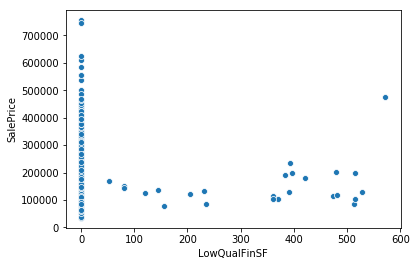

In [220]:
sns.scatterplot(x='LowQualFinSF',y='SalePrice',data=train)

### MasVnrArea, MiscVal

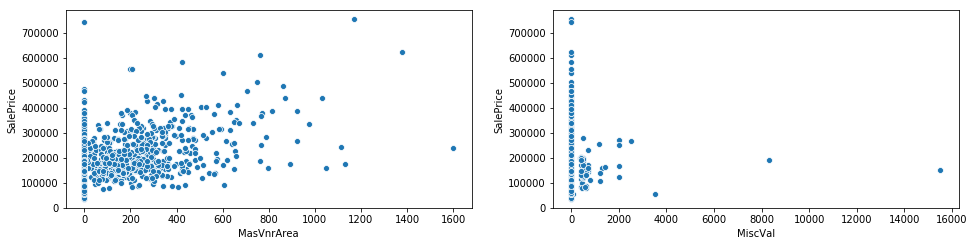

In [221]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.scatterplot(x='MasVnrArea',y='SalePrice',data=train)

plt.subplot(2,2,2)
sns.scatterplot(x='MiscVal',y='SalePrice',data=train)

**MasVnrArea: Looks to be linear - categorize using qcut to get rid of the outlier on the top left corner**<br>

In [222]:
#Categorize using binning
dataset['MasVnrAreaBin'] = pd.qcut(dataset['MasVnrArea'],3,duplicates='drop',labels=['MasVnrArea_Int1','MasVnrArea_Int2'])

#Binarize the binned variables
masVnrArea_code = pd.get_dummies(dataset['MasVnrAreaBin'],drop_first=True)

#Concatenate the dataframes
dataset = pd.concat([dataset,masVnrArea_code],axis=1)

#Drop the continuous and binned variables
dataset.drop('MasVnrArea',axis=1,inplace=True)
dataset.drop('MasVnrAreaBin',axis=1,inplace=True)

dataset.head()

,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,...,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,have2ndFlr,havePorch,1stFlrSF_Int2,1stFlrSF_Int3,1stFlrSF_Int4,2ndFlrSF_Int2,TotalBsmtSF_Int2,TotalBsmtSF_Int3,TotalBsmtSF_Int4,haveGarage,GarageArea_Int2,GarageArea_Int3,GarageArea_Int4,GrLivArea_Int2,GrLivArea_Int3,GrLivArea_Int4,GrLivArea_Int5,GrLivArea_Int6,LotFrontage_Int2,LotFrontage_Int3,MasVnrArea_Int2
0,0,NA,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,2,TA,RFn,TA,Attchd,2003.0,1,GasA,Ex,2Story,1,1,...,CollgCr,61,5,7,Y,0,NA,CompShg,Gable,Normal,208500,WD,0,Pave,8,AllPub,0,2003,2003,2008,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1
1,0,NA,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NA,TA,1,CBlock,2,Typ,2,TA,RFn,TA,Attchd,1976.0,0,GasA,Ex,1Story,2,1,...,Veenker,0,8,6,Y,0,NA,CompShg,Gable,Normal,181500,WD,0,Pave,6,AllPub,298,1976,1976,2007,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0
2,0,NA,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,2,TA,RFn,TA,Attchd,2001.0,1,GasA,Ex,2Story,3,1,...,CollgCr,42,5,7,Y,0,NA,CompShg,Gable,Normal,223500,WD,0,Pave,6,AllPub,0,2001,2002,2008,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1
3,0,NA,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NA,Gd,1,BrkTil,1,Typ,3,TA,Unf,TA,Detchd,1998.0,0,GasA,Gd,2Story,4,1,...,Crawfor,35,5,7,Y,0,NA,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,AllPub,0,1915,1970,2006,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,0,NA,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,3,TA,RFn,TA,Attchd,2000.0,1,GasA,Ex,2Story,5,1,...,NoRidge,84,5,8,Y,0,NA,CompShg,Gable,Normal,250000,WD,0,Pave,9,AllPub,192,2000,2000,2008,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1


### WoodDeckSF

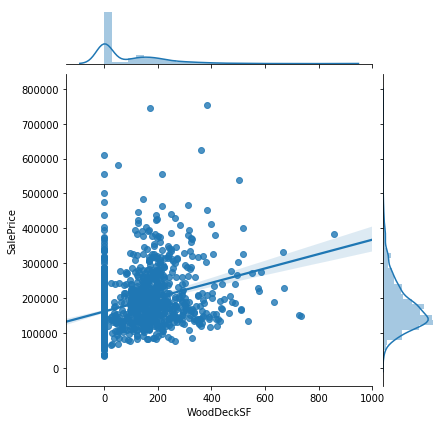

In [223]:
sns.jointplot(x='WoodDeckSF',y='SalePrice',kind='reg',data=train)

### AgeOfTheHouse and HasBeenRemodelled features creation

In [224]:
dataset['AgeOfTheHouse'] = 2020 - dataset['YearBuilt'] 

In [225]:
dataset.loc[dataset['YearBuilt'] == dataset['YearRemodAdd'], 'HasBeenRemodelled'] = 0
dataset.loc[dataset['YearBuilt'] != dataset['YearRemodAdd'], 'HasBeenRemodelled'] = 1

In [226]:
dataset.head()

,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,...,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,have2ndFlr,havePorch,1stFlrSF_Int2,1stFlrSF_Int3,1stFlrSF_Int4,2ndFlrSF_Int2,TotalBsmtSF_Int2,TotalBsmtSF_Int3,TotalBsmtSF_Int4,haveGarage,GarageArea_Int2,GarageArea_Int3,GarageArea_Int4,GrLivArea_Int2,GrLivArea_Int3,GrLivArea_Int4,GrLivArea_Int5,GrLivArea_Int6,LotFrontage_Int2,LotFrontage_Int3,MasVnrArea_Int2,AgeOfTheHouse,HasBeenRemodelled
0,0,NA,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,2,TA,RFn,TA,Attchd,2003.0,1,GasA,Ex,2Story,1,1,...,5,7,Y,0,NA,CompShg,Gable,Normal,208500,WD,0,Pave,8,AllPub,0,2003,2003,2008,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,17,0.0
1,0,NA,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NA,TA,1,CBlock,2,Typ,2,TA,RFn,TA,Attchd,1976.0,0,GasA,Ex,1Story,2,1,...,8,6,Y,0,NA,CompShg,Gable,Normal,181500,WD,0,Pave,6,AllPub,298,1976,1976,2007,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,44,0.0
2,0,NA,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,2,TA,RFn,TA,Attchd,2001.0,1,GasA,Ex,2Story,3,1,...,5,7,Y,0,NA,CompShg,Gable,Normal,223500,WD,0,Pave,6,AllPub,0,2001,2002,2008,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,19,1.0
3,0,NA,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NA,Gd,1,BrkTil,1,Typ,3,TA,Unf,TA,Detchd,1998.0,0,GasA,Gd,2Story,4,1,...,5,7,Y,0,NA,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,AllPub,0,1915,1970,2006,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,105,1.0
4,0,NA,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,3,TA,RFn,TA,Attchd,2000.0,1,GasA,Ex,2Story,5,1,...,5,8,Y,0,NA,CompShg,Gable,Normal,250000,WD,0,Pave,9,AllPub,192,2000,2000,2008,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,20,0.0


# Categorical Features

**ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, PoolQC, Fence, : OrdinalEncoder**<br>
**MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Bldgype,  HouseStyle, RoofStyle, RoofMat1, Exterior1st,  MasVnrType, Fuoundation, Heating, CentralAir, Electrical, Functional, GarageType, GarageFinish, PavedDrive, MiscFEature, SaleType, SaleCondition: get_dummies**<br>

In [227]:
from sklearn.preprocessing import OrdinalEncoder

In [228]:
#Need to have a reshaped array to ordinal encode
#ExterQual
ExterQual = dataset['ExterQual'].values.reshape(-1,1)

#ExterCond
ExterCond = dataset['ExterCond'].values.reshape(-1,1)

#BsmtQual
BsmtQual = dataset['BsmtQual'].values.reshape(-1,1)

#BsmtCond
BsmtCond = dataset['BsmtCond'].values.reshape(-1,1)

#BsmtExposure
BsmtExposure = dataset['BsmtExposure'].values.reshape(-1,1)

#BsmtFinType1
BsmtFinType1 = dataset['BsmtFinType1'].values.reshape(-1,1)

#BsmtFinType2
BsmtFinType2 = dataset['BsmtFinType2'].values.reshape(-1,1)

#HeatingQC
HeatingQC = dataset['HeatingQC'].values.reshape(-1,1)

#KitchenQual
KitchenQual = dataset['KitchenQual'].values.reshape(-1,1)

#FrireplaceQual
FireplaceQual = dataset['FireplaceQu'].values.reshape(-1,1)

#GarageQual
GarageQual = dataset['GarageQual'].values.reshape(-1,1)

#GarageCond
GarageCond = dataset['GarageCond'].values.reshape(-1,1)

#PoolQC
PoolQC = dataset['PoolQC'].values.reshape(-1,1)

#Fence
Fence = dataset['Fence'].values.reshape(-1,1)

In [229]:
#ExterQual, ExterCond, HeatingQC,KitchenQual,
enc1 = OrdinalEncoder(categories=[['Po','Fa','TA','Gd','Ex']])

#BsmtQual,BsmtCond,FireplaceQu,GarageQual,GarageCond
enc2 = OrdinalEncoder(categories=[['NA','Po','Fa','TA','Gd','Ex']])

#BsmtExposure
enc3 = OrdinalEncoder(categories=[['NA','No','Mn','Av','Gd']])

#BsmtFinType1,BsmtFinType2
enc4 = OrdinalEncoder(categories=[['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']])

#PoolQC
enc5 = OrdinalEncoder(categories=[['NA','Fa','TA','Gd','Ex']])

#Fence
enc6 = OrdinalEncoder(categories=[['NA','MnWw','GdWo','MnPrv','GdPrv']])

In [230]:
#ExterQual, ExterCond, HeatingQC,KitchenQual,
exterQual = enc1.fit_transform(ExterQual)
exterCond = enc1.fit_transform(ExterCond)
heatingQC = enc1.fit_transform(HeatingQC)
kitchenQual = enc1.fit_transform(KitchenQual)

#BsmtQual,BsmtCond,FireplaceQu,GarageQual,GarageCond
bsmtQual = enc2.fit_transform(BsmtQual)
bsmtCond = enc2.fit_transform(BsmtCond)
fireplaceQu = enc2.fit_transform(FireplaceQual)
garageQual = enc2.fit_transform(GarageQual)
garageCond = enc2.fit_transform(GarageCond)

#BsmtExposure
bsmtExposure = enc3.fit_transform(BsmtExposure)

#BsmtFinType1,BsmtFinType2
bsmtFinType1 = enc4.fit_transform(BsmtFinType1)
bsmtFinType2 = enc4.fit_transform(BsmtFinType2)

#PoolQC
poolQC = enc5.fit_transform(PoolQC)

#Fence
fence = enc6.fit_transform(Fence)

In [231]:
dataset['ExterQual_code'] = exterQual
dataset['ExterCond_code'] = exterCond
dataset['HeatingQC_code'] = heatingQC
dataset['KitchenQual_code'] = kitchenQual
dataset['BsmtQual_code'] = bsmtQual
dataset['BsmtCond_code'] = bsmtCond
dataset['FireplaceQu_Code'] = fireplaceQu

dataset['GarageQual_code'] = garageQual
dataset['GarageCond_code'] = garageCond
dataset['BsmtExposure_code'] = bsmtExposure
dataset['BsmtFinType1_code'] = bsmtFinType1
dataset['BsmtFinType2_code'] = bsmtFinType2
dataset['PoolQC_code'] = poolQC
dataset['Fence_code'] = fence

In [232]:
#Feature dropping
dataset.drop('ExterQual',axis=1,inplace=True)
dataset.drop('ExterCond',axis=1,inplace=True)
dataset.drop('HeatingQC',axis=1,inplace=True)
dataset.drop('KitchenQual',axis=1,inplace=True)
dataset.drop('BsmtQual',axis=1,inplace=True)
dataset.drop('BsmtCond',axis=1,inplace=True)
dataset.drop('FireplaceQu',axis=1,inplace=True)

dataset.drop('GarageQual',axis=1,inplace=True)
dataset.drop('GarageCond',axis=1,inplace=True)
dataset.drop('BsmtExposure',axis=1,inplace=True)
dataset.drop('BsmtFinType1',axis=1,inplace=True)
dataset.drop('BsmtFinType2',axis=1,inplace=True)
dataset.drop('PoolQC',axis=1,inplace=True)
dataset.drop('Fence',axis=1,inplace=True)

In [233]:
#Get dummy variables
msZoning = pd.get_dummies(data=dataset['MSZoning'],drop_first=True,prefix='MSZ')
street = pd.get_dummies(data=dataset['Street'],drop_first=True,prefix='Street')
alley = pd.get_dummies(data=dataset['Alley'],drop_first=True,prefix='Alley')
utilities = pd.get_dummies(data=dataset['Utilities'],drop_first=True,prefix='Util')

houseStyle = pd.get_dummies(data=dataset['HouseStyle'],drop_first=True,prefix='HouseSty')
heating = pd.get_dummies(data=dataset['Heating'],drop_first=True,prefix='Heat')
centralAir = pd.get_dummies(data=dataset['CentralAir'],drop_first=True,prefix='CA')
electrical = pd.get_dummies(data=dataset['Electrical'],drop_first=True,prefix='Elec')

miscFeature = pd.get_dummies(data=dataset['MiscFeature'],drop_first=True,prefix='MF')
saleType = pd.get_dummies(data=dataset['SaleType'],drop_first=True,prefix='ST')
saleCondition = pd.get_dummies(data=dataset['SaleCondition'],drop_first=True,prefix='SC')
lotConfig = pd.get_dummies(data=dataset['LotConfig'],drop_first=True,prefix='LC')

landSlope = pd.get_dummies(data=dataset['LandSlope'],drop_first=True,prefix='LS')
neighborhood = pd.get_dummies(data=dataset['Neighborhood'],drop_first=True,prefix='Neigh')
condition1 = pd.get_dummies(data=dataset['Condition1'],drop_first=True,prefix='C1')
bldgType = pd.get_dummies(data=dataset['BldgType'],drop_first=True,prefix='BT')

roofStyle = pd.get_dummies(data=dataset['RoofStyle'],drop_first=True,prefix='RS')
roofMatl = pd.get_dummies(data=dataset['RoofMatl'],drop_first=True,prefix='RM')
exterior1st = pd.get_dummies(data=dataset['Exterior1st'],drop_first=True,prefix='Ex1st')
masVnrType = pd.get_dummies(data=dataset['MasVnrType'],drop_first=True,prefix='MVT')

foundation = pd.get_dummies(data=dataset['Foundation'],drop_first=True,prefix='Found')
functional = pd.get_dummies(dataset['Functional'],drop_first=True,prefix='Func')
garageType = pd.get_dummies(data=dataset['GarageType'],drop_first=True,prefix='GT')
garageFinish = pd.get_dummies(data=dataset['GarageFinish'],drop_first=True,prefix='GF')

pavedDrive = pd.get_dummies(data=dataset['PavedDrive'],drop_first=True,prefix='PD')
pavedDrive = pd.get_dummies(data=dataset['LotShape'],drop_first=True,prefix='LS')
pavedDrive = pd.get_dummies(data=dataset['LandContour'],drop_first=True,prefix='LC')

In [234]:
#Concatenate dataframes
dataset = pd.concat([dataset,msZoning,street,utilities,houseStyle,heating,centralAir,electrical,miscFeature,
                     saleType,saleCondition,alley,lotConfig,landSlope,neighborhood,condition1,bldgType,roofStyle,
                     roofMatl,exterior1st,masVnrType,foundation,functional,garageType,garageFinish,pavedDrive],axis=1)

In [235]:
#Drop original variables
dataset.drop('MSZoning',axis=1,inplace=True)
dataset.drop('Street',axis=1,inplace=True)
dataset.drop('Alley',axis=1,inplace=True)
dataset.drop('Utilities',axis=1,inplace=True)

dataset.drop('HouseStyle',axis=1,inplace=True)
dataset.drop('Heating',axis=1,inplace=True)
dataset.drop('CentralAir',axis=1,inplace=True)
dataset.drop('Electrical',axis=1,inplace=True)

dataset.drop('MiscFeature',axis=1,inplace=True)
dataset.drop('SaleType',axis=1,inplace=True)
dataset.drop('SaleCondition',axis=1,inplace=True)
dataset.drop('LotConfig',axis=1,inplace=True)

dataset.drop('LandSlope',axis=1,inplace=True)
dataset.drop('Neighborhood',axis=1,inplace=True)
dataset.drop('Condition1',axis=1,inplace=True)
dataset.drop('BldgType',axis=1,inplace=True)

dataset.drop('RoofStyle',axis=1,inplace=True)
dataset.drop('RoofMatl',axis=1,inplace=True)
dataset.drop('Exterior1st',axis=1,inplace=True)
dataset.drop('MasVnrType',axis=1,inplace=True)

dataset.drop('Foundation',axis=1,inplace=True)
dataset.drop('Functional',axis=1,inplace=True)
dataset.drop('GarageType',axis=1,inplace=True)
dataset.drop('GarageFinish',axis=1,inplace=True)

dataset.drop('PavedDrive',axis=1,inplace=True)
dataset.drop('LotShape',axis=1,inplace=True)
dataset.drop('LandContour',axis=1,inplace=True)

# Feature Selection

### First check with Random Forest

In [236]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [237]:
#No need for ML problems in general
dataset.drop('Id',axis=1,inplace=True)

#Drop TotalRmsAbvGrd bc highly correlated with GrLivArea
dataset.drop('TotRmsAbvGrd',axis=1,inplace=True)

#Drop Condition2: same as Condition1
dataset.drop('Condition2',axis=1,inplace=True)

#Drop Exterior2nd
dataset.drop('Exterior2nd',axis=1,inplace=True)

In [238]:
train = dataset[:len_train]
test = dataset[len_train:]

X = train.drop('SalePrice',axis=1)
y = train['SalePrice']

In [239]:
rfr = RandomForestRegressor()

In [240]:
scores = cross_validate(estimator=rfr,X=X,y=y,cv=10)

In [241]:
score_mean = scores['test_score'].mean()
score_mean

0.8340999472331925

## Recursive Feature Elimination (RFE) with Regressor random Forest

In [242]:
from sklearn.feature_selection import RFE

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [244]:
rfr_2 = RandomForestRegressor()

In [245]:
rfe = RFE(estimator=rfr_2,n_features_to_select=25,step=1)

In [246]:
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
  n_features_to_select=25, step=1, verbose=0)

In [247]:
print('Chosen best 25 feature by rfe:',X_train.columns[rfe.get_support(indices=True)])

Chosen best 25 feature by rfe: Index(['BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF', 'FullBath', 'GarageCars',
       'GarageYrBlt', 'LotArea', 'MSSubClass', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd',
       'YrSold', '1stFlrSF_Int4', 'GrLivArea_Int6', 'AgeOfTheHouse',
       'ExterQual_code', 'HeatingQC_code', 'BsmtQual_code', 'FireplaceQu_Code',
       'BsmtExposure_code', 'GT_Detchd'],
      dtype='object')


## Recursive Feature Elimination with Cross-Validation and Random Forest Regressor

In [248]:
from sklearn.feature_selection import RFECV

In [249]:
rfr_3 = RandomForestRegressor()

In [250]:
rfecv = RFECV(estimator=rfr_3,step=1,cv=10,scoring='neg_mean_squared_log_error')

In [251]:
rfecv.fit(X_train,y_train)

RFECV(cv=10,
   estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None,
   scoring='neg_mean_squared_log_error', step=1, verbose=0)

In [252]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 105
Best features : Index(['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
       'GarageCars',
       ...
       'MVT_Stone', 'Found_CBlock', 'Found_PConc', 'Func_Typ', 'GT_Attchd',
       'GT_BuiltIn', 'GT_Detchd', 'GF_RFn', 'GF_Unf', 'LC_Lvl'],
      dtype='object', length=105)


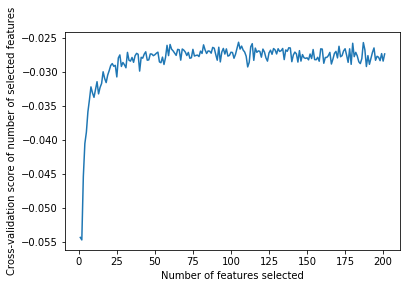

In [253]:
#Plot number of features vscross-validation scores 
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score of number of selected features')
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)

## Use of the 105 optimal features

In [254]:
#Definition of the optimized dataset using the optimal features
optimized_dataset = dataset[X_train.columns[rfecv.support_]]

In [255]:
optimized_dataset.shape

(2919, 105)

In [256]:
#Splitting of the dataset into train and test sets
train = optimized_dataset[:len_train]
test = optimized_dataset[len_train:]

#Addition of the target variable to the train set
train_original = pd.read_csv('train.csv')

train = pd.concat([train,train_original['SalePrice']],axis=1)

In [257]:
#Definition of X and y using the optimum train dataset
X_optimized = train.drop('SalePrice',axis=1)
y = train['SalePrice']

In [258]:
print(train.shape,test.shape)
print(X_optimized.shape,y.shape)

(1460, 106) (1459, 105)
(1460, 105) (1460,)


# MLA

## Linear Regression

In [259]:
from sklearn.linear_model import LinearRegression

In [260]:
linear = LinearRegression()

In [261]:
#Using k-fold CV
linear_scores = cross_validate(estimator=linear,X=X,y=y,cv=10)
linear_scores

{'fit_time': array([0.04288554, 0.02792573, 0.01695442, 0.01396275, 0.01795387,
        0.01595736, 0.01695347, 0.01695466, 0.01695585, 0.01695347]),
 'score_time': array([0.00099897, 0.00199485, 0.00199437, 0.00199485, 0.00099754,
        0.0019958 , 0.00199461, 0.0009973 , 0.0009973 , 0.00099683]),
 'test_score': array([0.42890657, 0.32659386, 0.8960836 , 0.78461866, 0.86923726,
        0.85203446, 0.85791031, 0.85376196, 0.63175089, 0.88464808]),
 'train_score': array([0.90458244, 0.90674501, 0.90327629, 0.91534311, 0.90683152,
        0.90706255, 0.90724895, 0.90739699, 0.91121713, 0.90533484])}

In [262]:
linear_scores_mean = linear_scores['test_score'].mean()
linear_scores_mean

0.73855456568183

## Decision Tree Regressor

In [263]:
from sklearn.tree import DecisionTreeRegressor

In [264]:
dtree = DecisionTreeRegressor()

In [265]:
dtree_scores = cross_validate(estimator=dtree,X=X_optimized,y=y,cv=10)

In [266]:
dtree_scores_mean = scores['test_score'].mean()
dtree_scores_mean

0.8340999472331925

## Regression Random Forest

In [267]:
from sklearn.ensemble import RandomForestRegressor

In [268]:
rfr = RandomForestRegressor(n_estimators=100)

In [269]:
reg_scores = cross_validate(estimator=rfr,X=X_optimized,y=y,cv=10)

In [270]:
rfr_scores_mean = scores['test_score'].mean()
rfr_scores_mean

0.8340999472331925

## XGBoost

In [271]:
import xgboost as xgb

In [272]:
from xgboost.sklearn import XGBRegressor

### Non-optimized

In [273]:
xgb_model = XGBRegressor(objective= 'reg:squarederror')

In [274]:
xgboost_scores = cross_validate(estimator=xgb_model,X=X_optimized,y=y,cv=10)

In [275]:
xgboost_scores_mean = xgboost_scores['test_score'].mean()
xgboost_scores_mean

0.866813477665597

### Optimized

In [276]:
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV

In [277]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=10, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['SalePrice'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Print model report:
    print("\nModel Report")
    print('Best iteration: {}'.format(cvresult.shape[0]))
    print(f'Accuracy: {np.sqrt(mean_squared_log_error(dtrain[target].values,dtrain_predictions))}')

In [278]:
target = 'SalePrice'
predictors = [x for x in train.columns if x not in [target]]

xgb1 = XGBRegressor(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree = 0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    seed=27)

In [279]:
modelfit(xgb1,train,predictors)


Model Report
Best iteration: 243
Accuracy: 0.03346109625860327


In [280]:
param_test1 = {
 'max_depth':range(1,15,1),
 'min_child_weight':range(2,10,1)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=243, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(train[predictors],train[target])
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 6}, -696285425.3959577)

**Optimal values: max_depth:5, min_child_weight: 6**

In [281]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=243, max_depth=5,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch3.fit(train[predictors],train[target])
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.0}, -696285425.3959577)

**Final optimum value for gamma: 0**<br>
**We'll look for the best iteration given the parameters we got, so far**

In [282]:
xgb2 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)


Model Report
Best iteration: 260
Accuracy: 0.0476218671103672


**Tuning of subsample and colsample_bytree**

In [283]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=260, max_depth=5,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch4.fit(train[predictors],train[target])
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.6}, -688927446.2794477)

**Optimum values for colsample_bytree: 0.9 and subsample: 0.6**<br>
**Now, we'll test smaller intervals around the optimum values we got**

In [284]:
param_test5 = {
 'subsample':[i/100.0 for i in range(50,70,5)],
 'colsample_bytree':[i/100.0 for i in range(80,100,5)]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=260, max_depth=5,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch5.fit(train[predictors],train[target])
gsearch5.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.65}, -688927446.2794477)

**Final optimum values for colsample_bytree and subsample: 0.0 and 0.65**<br>
**Tune Regularization parameters to reduce overfitting**<br>

In [285]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=260, max_depth=5,
 min_child_weight=6, gamma=0, subsample=0.65, colsample_bytree=0.9,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch6.fit(train[predictors],train[target])
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 1}, -675137266.3949564)

**Optimum value for reg_alpha: 1**

In [289]:
xgb3 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=6,
 gamma=0,
 subsample=0.65,
 colsample_bytree=0.9,
 reg_alpha=1,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train, predictors)


Model Report
Best iteration: 341
Accuracy: 0.038739308985602086


**The accuracy slightly increases**<br>
**AS the accuracy increased a bit, 'max_depth' and 'min_child_weight' have been tuned manually**

In [299]:
xgb4 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=8,
 min_child_weight=2,
 gamma=0,
 subsample=0.65,
 colsample_bytree=0.9,
 reg_alpha=1,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, train, predictors)


Model Report
Best iteration: 545
Accuracy: 0.00017888012453794007


**The accuracy increases, hence the optimum parameters are:**
- learning_rate: 0.1<br>
- n_estimators: 545<br>
- max_depth: 8<br>
- min_child_weight: 2<br>
- gamma: 0<br>
- subsample:0.65<br>
- colsample_bytree:0.9<br>
- reg_alpha: 1

In [300]:
xgb5 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=545,
 max_depth=8,
 min_child_weight=2,
 gamma=0,
 subsample=0.65,
 colsample_bytree=0.9,
 reg_alpha=1,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [301]:
xgboost_opt_scores = cross_validate(estimator=xgb5,X=X_optimized,y=y,cv=10)

In [302]:
xgboost_opt_scores_mean = xgboost_scores['test_score'].mean()
xgboost_opt_scores_mean

0.866813477665597

In [303]:
scores = pd.DataFrame(data=[linear_scores_mean,rfr_scores_mean,xgboost_scores_mean,xgboost_opt_scores_mean],
                      index=['Linear Regression','Random Forest','XGBoost','XGBoost_opt'],columns=['Scores'])
scores.sort_values(by=['Scores'],ascending=False,inplace=True)
scores

,Scores
XGBoost,0.866813
XGBoost_opt,0.866813
Random Forest,0.834100
Linear Regression,0.738555
